In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


In [16]:
def execute(X_train, X_test, Y_train, Y_test):

  accuracy = []
 
  lda = LinearDiscriminantAnalysis()
  lda.fit(X_train, Y_train)
  Y_pred = lda.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_pred))
  print('LDA\n', accuracy_score(Y_test, Y_pred))

  lp = Perceptron()
  lp.fit(X_train, Y_train)
  Y_pred = lp.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_pred))
  print('Preceptron\n', accuracy_score(Y_test, Y_pred))

  nb = GaussianNB()
  nb.fit(X_train, Y_train)
  Y_pred = nb.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_pred))
  print('GaussianNB\n', accuracy_score(Y_test, Y_pred))

  lr = LogisticRegression(solver = 'sag',max_iter = 1000)
  lr.fit(X_train, Y_train)
  Y_pred = lr.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_pred))
  print('Logistic Regression\n', accuracy_score(Y_test, Y_pred))

  ann = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000)
  ann.fit(X_train, Y_train)
  Y_pred = ann.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_pred))
  print('MLP Classifier\n', accuracy_score(Y_test, Y_pred))

  SVM = SVC()
  SVM.fit(X_train, Y_train)
  Y_pred = SVM.predict(X_test)
  accuracy.append(accuracy_score(Y_test, Y_pred))
  print('SVC\n', accuracy_score(Y_test, Y_pred))

  return accuracy
  

In [17]:
df = pd.read_csv(r"E:\BITS\Yr 3 Sem 2\BITS F464 Machine Learning\Assignments\Assignment 2\2C\dataset_comb.csv")
Y = df["Class"].to_numpy()
X = df.drop(columns = ["Class"]).to_numpy()
kf = KFold(n_splits=7, random_state=None, shuffle=True)
accuracy = []
for train_index, test_index in kf.split(df):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]
  accuracy.append(execute(X_train, X_test, Y_train, Y_test))

LDA
 1.0
Preceptron
 0.9876828329484219
GaussianNB
 0.9826789838337182
D:\Pandora's Box\Installations\Python\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
Logistic Regression
 0.9992301770592764
MLP Classifier
 1.0
SVC
 0.9688221709006929
LDA
 1.0
Preceptron
 0.9911470361816782
GaussianNB
 0.9780600461893765
D:\Pandora's Box\Installations\Python\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
Logistic Regression
 0.9973056197074672
MLP Classifier
 0.9996150885296382
SVC
 0.9745958429561201
LDA
 1.0
Preceptron
 0.9969207082371054
GaussianNB
 0.9807544264819091
D:\Pandora's Box\Installations\Python\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mea

Text(0, 0.5, 'Accuracy')

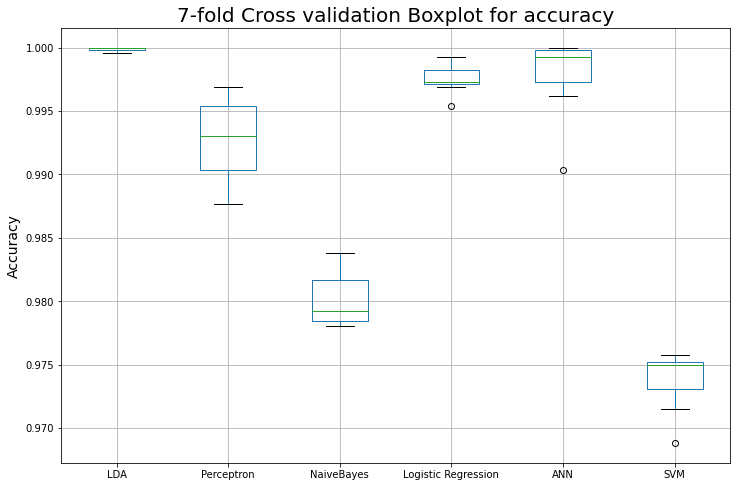

In [22]:
accuracy_df = pd.DataFrame(np.array(accuracy),columns=['LDA', 'Perceptron', 'NaiveBayes','Logistic Regression','ANN','SVM'])
fig, ax = plt.subplots(figsize=(12, 8))
ax = accuracy_df.boxplot()
ax.set_title('7-fold Cross validation Boxplot for accuracy', fontsize=20)
ax.set_ylabel("Accuracy", fontsize=14)

Text(0.5, 0, 'Fold Count')

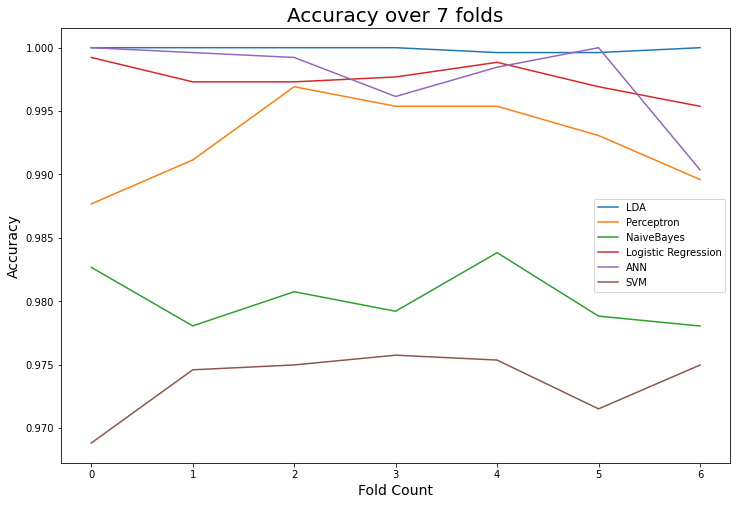

In [23]:
bbplot = accuracy_df.plot(figsize=(12, 8))
bbplot.set_title('Accuracy over 7 folds', fontsize=20)
bbplot.set_ylabel("Accuracy", fontsize=14)
bbplot.set_xlabel("Fold Count", fontsize=14)